In [1]:
from datetime import datetime
import os
import pandas as pd
import pandas_datareader.data as web

## fetch data from yahoo fincance & write data as csv file into local folder

In [2]:
def fetch_data(ticker, start='2010-01-01', end='today'):
    print(ticker)

    start_date = datetime.strptime(start, '%Y-%m-%d')
    if end == 'today':
        end_date = datetime.today()
    else:
        end_date = datetime.strptime(end, '%Y-%m-%d')
         
    try:
        df = web.DataReader(ticker, 'yahoo', start_date, end_date)
        if not os.path.exists('stock_details'):
            os.mkdir('stock_details')
        df.to_csv('stock_details/{}.csv'.format(ticker))
    except Exception as e:
        print(e)

In [3]:
fetch_data('AAPL', start='2000-01-01')

AAPL


## import data

In [4]:
def get_data(ticker):
    if not os.path.exists('stock_details/{}.csv'.format(ticker)):
        return None
    
    df = pd.read_csv('stock_details/{}.csv'.format(ticker),index_col = 'Date',parse_dates = True )
    return df

In [5]:
data = get_data('AAPL')
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.856887
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.784643
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.796124
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.727229
2000-01-07,0.901786,0.852679,0.861607,0.888393,460734400.0,0.761677
...,...,...,...,...,...,...
2022-01-04,182.940002,179.119995,182.630005,179.699997,99310400.0,179.699997
2022-01-05,180.169998,174.639999,179.610001,174.919998,94537600.0,174.919998
2022-01-06,175.300003,171.639999,172.699997,172.000000,96904000.0,172.000000


## connect to sql server

In [6]:
from sqlalchemy import create_engine
engine = create_engine("mssql+pyodbc://@localhost/Test?driver=sql server native client 11.0?trusted_connection=yes")
conn = engine.connect()
print(conn)

## import data into sql server

In [7]:
data.to_sql('stock1', engine, if_exists='replace')

In [8]:
for i in os.listdir('stock_details'):

    if i.endswith('.csv'):
        print(i)
        name = i.split('.csv')[0]
        locals()[name] = pd.read_csv('stock_details/{}'.format(i))
        print(locals()[name])
        locals()[name].to_sql(name, engine, if_exists='replace', index=False)

AAPL.csv
            Date        High         Low        Open       Close       Volume  \
0     2000-01-03    1.004464    0.907924    0.936384    0.999442  535796800.0   
1     2000-01-04    0.987723    0.903460    0.966518    0.915179  512377600.0   
2     2000-01-05    0.987165    0.919643    0.926339    0.928571  778321600.0   
3     2000-01-06    0.955357    0.848214    0.947545    0.848214  767972800.0   
4     2000-01-07    0.901786    0.852679    0.861607    0.888393  460734400.0   
...          ...         ...         ...         ...         ...          ...   
5537  2022-01-04  182.940002  179.119995  182.630005  179.699997   99310400.0   
5538  2022-01-05  180.169998  174.639999  179.610001  174.919998   94537600.0   
5539  2022-01-06  175.300003  171.639999  172.699997  172.000000   96904000.0   
5540  2022-01-07  174.139999  171.029999  172.889999  172.169998   86580100.0   
5541  2022-01-10  171.720001  168.179993  169.080002  169.200302   52264329.0   

       Adj Close  

In [9]:
pd.read_sql('AAPL', conn)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.856887
1,2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.784643
2,2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.796124
3,2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.727229
4,2000-01-07,0.901786,0.852679,0.861607,0.888393,460734400.0,0.761677
...,...,...,...,...,...,...,...
5537,2022-01-04,182.940002,179.119995,182.630005,179.699997,99310400.0,179.699997
5538,2022-01-05,180.169998,174.639999,179.610001,174.919998,94537600.0,174.919998
5539,2022-01-06,175.300003,171.639999,172.699997,172.000000,96904000.0,172.000000
5540,2022-01-07,174.139999,171.029999,172.889999,172.169998,86580100.0,172.169998


In [10]:
pd.read_sql_query('select * from AAPL', conn)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.856887
1,2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.784643
2,2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.796124
3,2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.727229
4,2000-01-07,0.901786,0.852679,0.861607,0.888393,460734400.0,0.761677
...,...,...,...,...,...,...,...
5537,2022-01-04,182.940002,179.119995,182.630005,179.699997,99310400.0,179.699997
5538,2022-01-05,180.169998,174.639999,179.610001,174.919998,94537600.0,174.919998
5539,2022-01-06,175.300003,171.639999,172.699997,172.000000,96904000.0,172.000000
5540,2022-01-07,174.139999,171.029999,172.889999,172.169998,86580100.0,172.169998


## draw a graph

In [11]:
import matplotlib.pyplot as plt

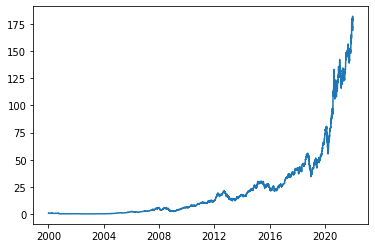

In [12]:
plt.plot(data['Adj Close'])